In [1]:
import pandas as pd

import numpy as np
import re


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Counter
from collections import Counter

# for visulization
import plotly.graph_objects as go

#sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLP text-preprocessing toolkit
import nltk.corpus
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarakimmich/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarakimmich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sarakimmich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sarakimmich/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarakimmich/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
dataframe = pd.read_csv("L4G_Qual_Dataset_cleanedv20201104.csv")

In [21]:
dataframe.head()

,NP_rating (0-10 scale),NPS_type,Q2_What is org GOOD AT,Q3_What could org DO BETTER,Age_groups,Age_specific,Gender,Race/Ethnicity,RespondentID,OrgID,...,Annual Budget Range,Issue Area_SL1,Issue Area_SL2,Issue Area_SL3,SurveyID,Survey_StartDate,Survey_EndDate,month_svy_completed,year_svy_completed,Region/Community
0,10,Promoter,They make you feel safe and accepted,They are doing great!,25-34 years old,25-34 years old,Female,Hispanic or Latino,6668182155,1,...,$10M-$25M,Human Services,Shelter and Residential Care,Domestic Violence Shelters,127715028,1-Feb-18,1-Feb-18,2,2018,5.0
1,10,Promoter,Helping those who want help/want to do better....,Besides the variety of food served and the tas...,25-34 years old,25-34 years old,Female,Black or African American,6668191579,1,...,$10M-$25M,Human Services,Shelter and Residential Care,Domestic Violence Shelters,127715028,1-Feb-18,1-Feb-18,2,2018,5.0
2,10,Promoter,Being there for people,Put a lock on my room,18-24 years old,18-24 years old,Female,Hispanic or Latino,6668195047,1,...,$10M-$25M,Human Services,Shelter and Residential Care,Domestic Violence Shelters,127715028,1-Feb-18,1-Feb-18,2,2018,5.0
3,10,Promoter,the staff,nothing,18-24 years old,18-24 years old,Female,White,6668201953,1,...,$10M-$25M,Human Services,Shelter and Residential Care,Domestic Violence Shelters,127715028,1-Feb-18,1-Feb-18,2,2018,5.0
4,7,Passive,"providing services, resources, safety issues, ...",availability and more security,25-34 years old,25-34 years old,Female,Black or African American,6669999941,1,...,$10M-$25M,Human Services,Shelter and Residential Care,Domestic Violence Shelters,127718692,2-Feb-18,2-Feb-18,2,2018,5.0


In [22]:
dataframe.columns

Index(['NP_rating (0-10 scale)', 'NPS_type', 'Q2_What is org GOOD AT',
       'Q3_What could org DO BETTER', 'Age_groups', 'Age_specific', 'Gender',
       'Race/Ethnicity', 'RespondentID', 'OrgID', 'State',
       'Annual Budget Range', 'Issue Area_SL1', 'Issue Area_SL2',
       'Issue Area_SL3', 'SurveyID', 'Survey_StartDate', 'Survey_EndDate',
       'month_svy_completed', 'year_svy_completed', 'Region/Community'],
      dtype='object')

In [23]:
dataframe["NPS_type"].value_counts()

Promoter     57118
Passive      11964
Detractor     9514
Name: NPS_type, dtype: int64

In [24]:
dataframe["NP_rating (0-10 scale)"].value_counts(normalize=True)*100

10        60.843754
9          9.945840
8          9.536852
7          5.290815
5          4.046501
6          2.730304
#NULL!     2.591496
4          1.410388
0          1.248033
3          1.052214
2          0.676689
1          0.627115
Name: NP_rating (0-10 scale), dtype: float64

In [25]:
sum(dataframe["NP_rating (0-10 scale)"].value_counts())/10

8068.7

In [26]:
def sentiment_analysis(data, title):
    try:
        sid = SentimentIntensityAnalyzer()
        neg = 0.0
        pos = 0.0
        neu = 0.0
        cop = 0.0
        for text in data:
            try:
                sentiment = dict(sid.polarity_scores(text))
        #         print(sentiment)
                cop += sentiment["compound"]
                neg += sentiment["neg"]
                neu += sentiment["neu"]
                pos += sentiment["pos"]

#                 print(text)
#                 print(sentiment)
            except Exception as error:
                continue;
#         print(sentiment_list)
        labels = ['Negative', 'Positive', 'Neutral']
        values = [neg, pos, neu]

        fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
        fig.update_layout(
            title=title)
        fig.show()
    except Exception as error:
        return ""

### Sentiment Analysis

In [27]:
sentiment_analysis(dataframe["Q2_What is org GOOD AT"], "Good At")

In [28]:
sentiment_analysis(dataframe["Q3_What could org DO BETTER"], "Could do better")

### Strengths and weakness(WordCloud)

In [29]:
def word_visual(data_word_input, name=None, path=None):
    """
    This function will visualize the text into cloud the bigger
    the word is the highest frequency of the word.
    :param data_word_input:
    :param name:
    :param path:
    :return:
    """
    wordcloud = WordCloud().generate(str(" ".join(str(i) for i in data_word_input)))
    
#     print(dir(wordcloud))
#     print(wordcloud.words_)
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # un-comment to display the image
    plt.show()
    return wordcloud.words_
#     wordcloud.to_file(path + "/" + name + '.png')

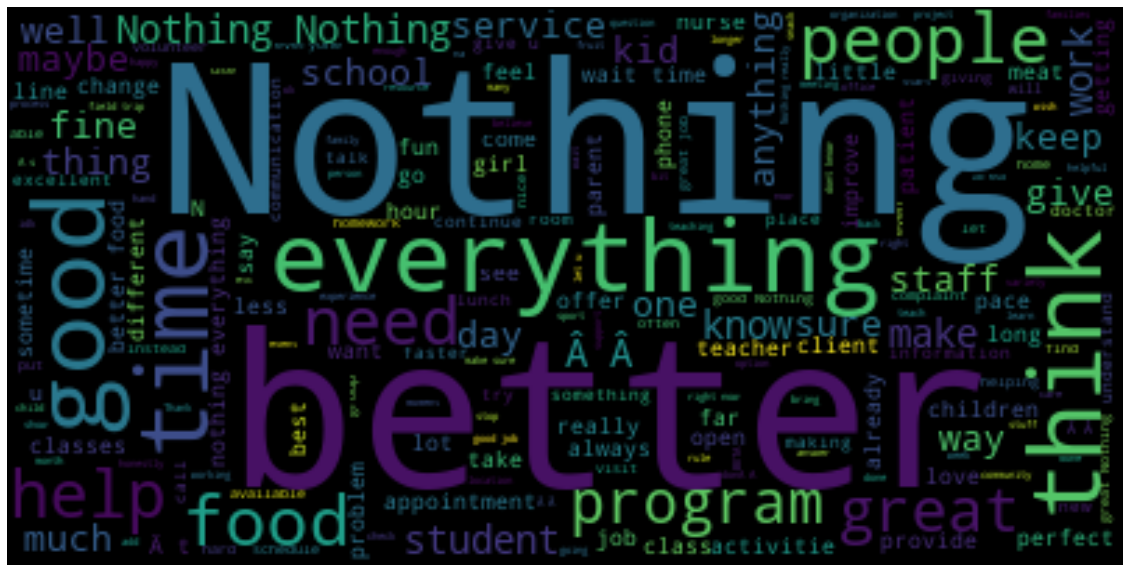

In [30]:
word_most_fre_h = word_visual(dataframe["Q3_What could org DO BETTER"].
                              apply(lambda x: x if isinstance(x, str) else ""))

In [38]:
def plot_each_token_len(list_token, title, x_title, y_title):
    """
    Visualize the token with their respective length.
    :param list_token:
    :param title:
    :param domain_index:
    :return:
    """

    layout = go.Layout(
        xaxis=dict(
            titlefont=dict(
                family='Arial, sans-serif',
                size=20,
                color='lightgrey'
            ),
            showticklabels=True,
            tickangle=45,
            tickfont=dict(
                family='Old Standard TT, serif',
                size=20,
                color='black'
            )
        ))
    fig = go.Figure([go.Bar(y=list(i for i in list_token.values)[:50], x=list(str(i) for i in list_token.keys()))], layout=layout)

    fig.update_layout(
        title=title,
        xaxis_title=x_title,
        yaxis_title=y_title)
    fig.show()

In [39]:

def  clean_text(text_field):
    """
    Process the language data to remove noise so that the machine can more easily 
    detect the patterns in the data. Text data contains a lot of noise, 
    this takes the form of special characters such as html tags, hashtags, 
    punctuation and numbers etc.
    :param text_field: text data to clean.
    :return result: cleaned text data
    """
    try:

      remove_extra_charatcter = lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)
      # remove numbers
      remove_number = lambda elem: re.sub(r"\d+", "", elem)
      # if isinstance(text_field, list):
      #   text_field = "".join(i for i in text_field)
      result = remove_number(remove_extra_charatcter(text_field.lower()))
      
      result = ' '.join([word for word in result.split() if word not in stop])

      return result
    except Exception as error:
      return "empty"

In [40]:
all_text = " ".join(txt if isinstance(txt, str) else "" for txt in dataframe["Q3_What could org DO BETTER"])
index = pd.Index(clean_text(all_text).split(" "))
index.value_counts()

nothing                                  10416
better                                    5676
everything                                4402
good                                      4152
time                                      3640
                                         ...  
classesperiodsteachersuniformtimefood        1
anf                                          1
producer                                     1
sar                                          1
thinkhope                                    1
Length: 17779, dtype: int64

CLustering similar context client Q3_What could org DO BETTER


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
list_index = []
for txt in dataframe["Q3_What could org DO BETTER"]:
  list_index.append(clean_text(txt))
X = vectorizer.fit_transform(list_index)

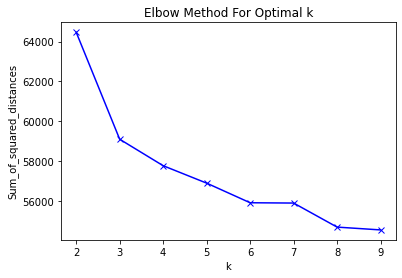

       cluster                       q3
80686        0  nothing everything good
16867        0             good service
16854        0      good condition good
16853        0                     good
64579        0                 good job
...        ...                      ...
15727        6               everything
15733        6          everything else
4116         6               everything
46038        6     everything excellent
4437         6                     fine

[80687 rows x 2 columns]


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
result_df=pd.DataFrame(list(zip(list_index,labels)),columns=['q3','cluster'])
print(result.sort_values(by=['cluster']))

Cluster: 0
q3


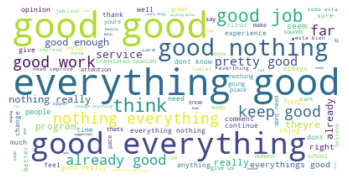

Cluster: 1
q3


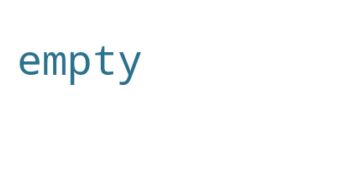

Cluster: 2
q3


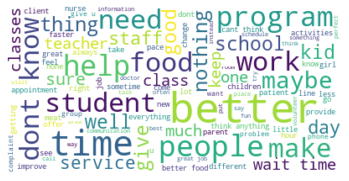

Cluster: 3
q3


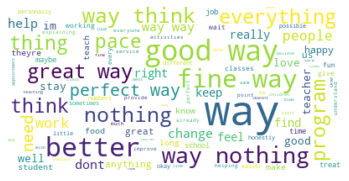

Cluster: 4
q3


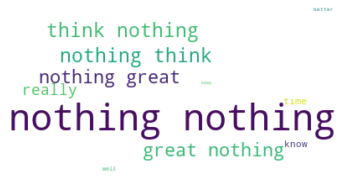

Cluster: 5
q3


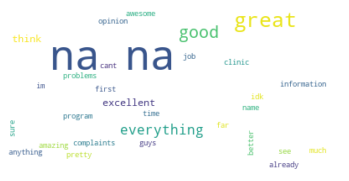

Cluster: 6
q3


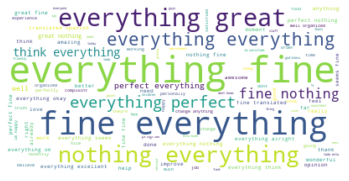

In [37]:
result={'cluster':labels,'q3':list_index}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['q3'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('q3')
   titles=result_df[result_df.cluster==k]['q3']         
  #  print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()


In [36]:
plot_each_token_len(index.value_counts(), "Top token words in Q3", "Tokens", "Frequency")

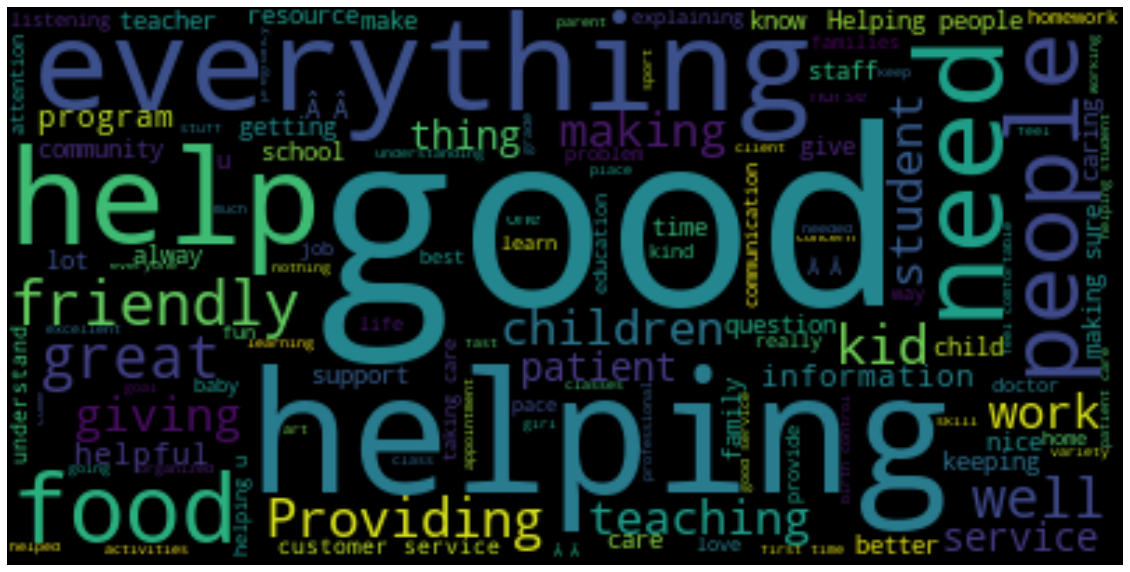

In [43]:
word_most_fre_h = word_visual(dataframe["Q2_What is org GOOD AT"].
                              apply(lambda x: x if isinstance(x, str) else "")) 

In [56]:
all_text_q2 = " ".join(txt if isinstance(txt, str) else "" for txt in dataframe["Q2_What is org GOOD AT"])
index_q2 = pd.Index(clean_text(all_text).split(" "))
index_q2.value_counts()

nothing                                  10416
better                                    5676
everything                                4402
good                                      4152
time                                      3640
                                         ...  
classesperiodsteachersuniformtimefood        1
anf                                          1
producer                                     1
sar                                          1
thinkhope                                    1
Length: 17779, dtype: int64

CLustering similar context client Q2_What is org GOOD AT

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
list_index_q2 = []
for txt in dataframe["Q2_What is org GOOD AT"]:
  list_index_q2.append(clean_text(txt))
X_q2 = vectorizer.fit_transform(list_index_q2)

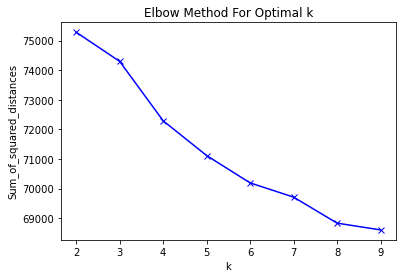

       cluster                                                 q2
0            0                            make feel safe accepted
48911        0                               teaching child level
48912        0           helping build wonderful resumes find job
48913        0  meeting every need clients may comes education...
48914        0  helping interview clothes getting enrolled col...
...        ...                                                ...
48697        6                      club good helping us homework
73207        6                                     helping people
73206        6                                  helping community
15093        6                             helping people housing
24369        6  customer service helping people stay healthy m...

[80687 rows x 2 columns]


In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X_q2)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X_q2)
labels=model.labels_
result_df=pd.DataFrame(list(zip(list_index_q2,labels)),columns=['q2','cluster'])
print(result.sort_values(by=['cluster']))

Cluster: 0
q2


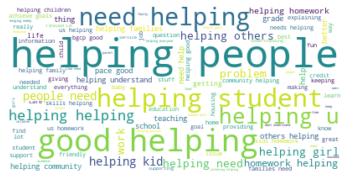

Cluster: 1
q2


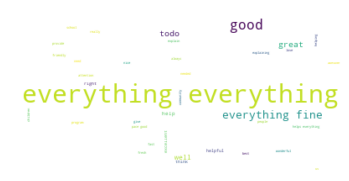

Cluster: 2
q2


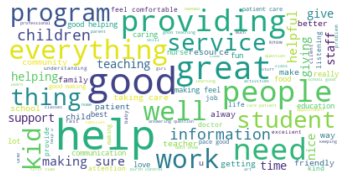

Cluster: 3
q2


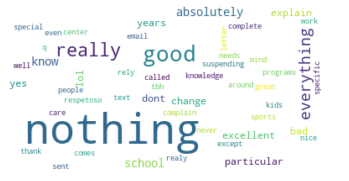

Cluster: 4
q2


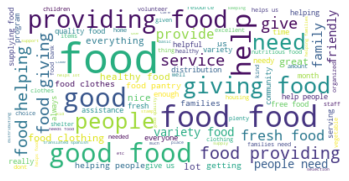

Cluster: 5
q2


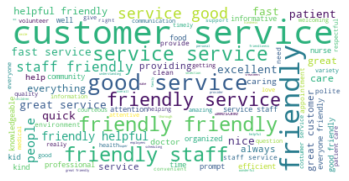

Cluster: 6
q2


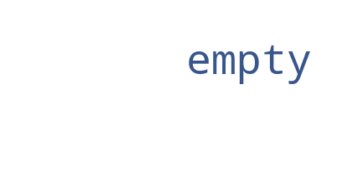

In [59]:
result={'cluster':labels,'q2':list_index_q2}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['q2'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('q2')
   titles=result_df[result_df.cluster==k]['q2']         
  #  print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()


In [60]:
plot_each_token_len(index_q2.value_counts(), "Top token words in Q2", "Tokens", "Frequency")

### Positive and Negative Data

In [61]:
data_words = pd.read_csv("PositiveAndNegativeWords.csv")

In [62]:
positive_word_list = list()
negative_word_list = list()

In [ ]:
n_list = list(data_words["Negative"].astype(str))
p_list = list(data_words["Positive"].astype(str))

for find_w in all_text_q2.split(" "):

    if find_w in  n_list:
        negative_word_list.append(find_w)
    elif find_w in p_list:
        positive_word_list.append(find_w)
    else:
        continue;

In [ ]:
index_pos_q2 = pd.Index(positive_word_list)
plot_each_token_len(index_pos_q2.value_counts(), "Q2-data", "positive_word", "count")

index_neg_q2 = pd.Index(negative_word_list)
plot_each_token_len(index_neg_q2.value_counts(), "Q2-data", "negative_word", "count")



In [ ]:
positive_word_list_q3 = list()
negative_word_list_q3 = list()

In [ ]:
for find_w in all_text.split(" "):

    if find_w in  n_list:
        negative_word_list_q3.append(find_w)
    elif find_w in p_list:
        positive_word_list_q3.append(find_w)
    else:
        continue;

        
        
        
index_pos_q3 = pd.Index(positive_word_list_q3)
plot_each_token_len(index_pos_q3.value_counts(), "Q3-data", "positive_word", "count")

index_neg_q3 = pd.Index(negative_word_list_q3)
plot_each_token_len(index_neg_q3.value_counts(), "Q3-data", "negative_word", "count")



In [ ]:
import spacy

def noun_adj_pair(text):
    try:
        global counter
        counter += 1
        print(counter)
        nlp = spacy.load('en')
        doc = nlp(text)
        noun_adj_pairs = []
        for i,token in enumerate(doc):
            if token.pos_ not in ('NOUN','PROPN'):
                continue
            for j in range(i+1,len(doc)):
                if doc[j].pos_ == 'ADJ':
                    noun_adj_pairs.append((token,doc[j]))
                    break
#         print("text: ", text)
#         print("result: ",noun_adj_pairs)
        return noun_adj_pairs
    except Exception as error:
        print("error: ", text)
        return "error"

### Specifications POS-Tagger

In [ ]:
counter = 0
selected_pairs_final_q2 = dataframe["Q2_What is org GOOD AT"][:100].apply(lambda x: noun_adj_pair(x))

In [ ]:
counter=0
selected_pairs_final_q3 = dataframe["Q3_What could org DO BETTER"][:100].apply(lambda x: noun_adj_pair(x))

In [ ]:
counter=0
adj_noun_pair_q2 = noun_adj_pair(all_text_q2)
adj_noun_pair_q3 = noun_adj_pair(all_text)

In [ ]:
all_text_q2

In [ ]:
select_entity_word_q2 = ["needy", "trouble", "sick", "supportive", "clean"]
select_entity_word_q3 = ["hard", "bad", "strict", "friendly", "improvement"]

selected_pairs_final_q2 = []
selected_pairs_final_q3 = []
for q2_p in adj_noun_pair_q2:
    for pairs in adj_noun_pair_q2:
        if q2_p in str(pairs):
            selected_pairs_final_q2.append([q2_p, str(pairs)])
            
for q3_p in select_entity_word_q3:
    for pairs in adj_noun_pair_q3:
        if q3_p in str(pairs):
            selected_pairs_final_q3.append([q3_p, str(pairs)])
            


In [ ]:
!pip install webweb

In [ ]:
from webweb import Web
# instantiate webweb and show the result
web = Web(selected_pairs_final_q2[93])
web.display.width = 2000
web.display.height = 1000
web.show()

In [ ]:
# instantiate webweb and show the result
web = Web(selected_pairs_final_q3)
web.display.width = 2000
web.display.height = 1000
web.show()